# Embedding Text-Embedding-3-Small 

In [1]:
import pandas as pd
from pathlib import Path
import os
from sklearn.pipeline import Pipeline
from openai import OpenAI
import dotenv


In [2]:
root = Path('.').resolve().parent
print(root)
file = "df_challenge_meli_base.csv"
pathfile = os.path.join(root,'src','data','raw',file)
df=pd.read_csv(pathfile, delimiter=',', encoding='Latin-1')
df.head(2)

D:\Clustering_MeLi


,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.0,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185250 entries, 0 to 185249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            185250 non-null  object 
 1   seller_nickname    185250 non-null  object 
 2   titulo             185250 non-null  object 
 3   seller_reputation  182878 non-null  object 
 4   stock              185250 non-null  int64  
 5   logistic_type      185250 non-null  object 
 6   condition          185250 non-null  object 
 7   is_refurbished     185250 non-null  bool   
 8   price              183734 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          185250 non-null  object 
 11  url                185250 non-null  object 
 12  category_id        185250 non-null  object 
 13  category_name      185250 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 18.6+ MB


In [4]:
df_new = df.copy()
# Codificamos la variable regular_price, solo para saber si tiene producto regular
df_new['regular_price1']=df_new['regular_price'].apply(lambda x: "yes" if x > 0 else "no")
df_new.head(2)

,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name,regular_price1
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.0,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA,yes
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA,no


In [5]:
df_new = df_new[df_new['price'].isnull()==False]
df_new = df_new[df_new['seller_reputation'].isnull()==False]
df_new['isrefu'] = df_new['is_refurbished'].apply(lambda x: 'is refubirshed' if x == True else 'not refubirshed' )

In [6]:
siglas = ['XD', 'FBM', 'DS', 'FLEX', 'Otro']
logistic_type = ['Cross Docking', 'FulfilledbyMerchant', 'DropShipping', 'FLEX', 'Other']

df_lgt = pd.DataFrame(data={'Siglas_lt':siglas,"Lt":logistic_type})
df_new=pd.merge(left=df_new, right=df_lgt, how='left', left_on='logistic_type',right_on='Siglas_lt')

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181369 entries, 0 to 181368
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            181369 non-null  object 
 1   seller_nickname    181369 non-null  object 
 2   titulo             181369 non-null  object 
 3   seller_reputation  181369 non-null  object 
 4   stock              181369 non-null  int64  
 5   logistic_type      181369 non-null  object 
 6   condition          181369 non-null  object 
 7   is_refurbished     181369 non-null  bool   
 8   price              181369 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          181369 non-null  object 
 11  url                181369 non-null  object 
 12  category_id        181369 non-null  object 
 13  category_name      181369 non-null  object 
 14  regular_price1     181369 non-null  object 
 15  isrefu             181369 non-null  object 
 16  Si

In [8]:
df_g = df_new[['seller_nickname', 'seller_reputation', 'Lt', 'condition', 'isrefu', 'category_id','regular_price1', 
               'price', 'stock']]
#df_cat = df_g.groupby(['seller_nickname']
#                     )['category_id'].apply(lambda x : ','.join((set(x)))).reset_index()
#df_cat.tail()


In [9]:
df_g.shape[0]
df_new['products'] = 1

In [10]:
cols = ['seller_reputation', 'Lt', 'condition', 'isrefu', 'category_id','regular_price1']
f=1
dff =pd.DataFrame()
for i in cols:
    #df[i].astype('str')
    df = df_g.groupby(['seller_nickname']
                    )[i].apply(lambda x : ",".join((set(x)))).reset_index()
    if f>1 :
        dff = pd.merge(left=dff , right= df, how='left', left_on='seller_nickname', right_on='seller_nickname' )
    else: dff = df
    print(f)
    f=f+1

dff.tail(10)

1
2
3
4
5
6


,seller_nickname,seller_reputation,Lt,condition,isrefu,category_id,regular_price1
44071,fff33fa5bf,green,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"INDUSTRY,HOUSEHOLD APPLIANCES","yes,no"
44072,fff3ac9865,green,DropShipping,new,not refubirshed,"CPG HOME CARE,HEALTH",no
44073,fff98c73f4,green_silver,Cross Docking,new,not refubirshed,ACC CARS & VANS,no
44074,fff99199fa,green_silver,Cross Docking,new,not refubirshed,"BEAUTY PERSONAL CARE,HEALTH",yes
44075,fff9f4c6a0,newbie,Other,new,not refubirshed,PET,no
44076,fffac55ae4,red,Cross Docking,new,not refubirshed,WEARABLES,no
44077,fffbc92083,green_platinum,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"SECURITY,LIGHTING",yes
44078,fffd101739,green,Other,new,not refubirshed,INDUSTRY,no
44079,fffe8e78c1,green_platinum,FulfilledbyMerchant,new,not refubirshed,"STATIONERY,BEAUTY PROFESSIONAL,TEXTILES,SPORTS...",yes
44080,ffff407100,green_silver,Cross Docking,new,not refubirshed,SPORTS,no


In [11]:
df_g2 = df_new
df_g2 = df_g2.groupby('seller_nickname').sum().reset_index()
df_emb = pd.merge(left=df_g2[['seller_nickname', 'products', 'stock','price']], right=dff, how='left', left_on='seller_nickname', 
                  right_on='seller_nickname')
df_emb['pxp'] = (df_emb['price']/df_emb['stock']).round(decimals=2)
df_emb['pxp'].round( decimals=2)
df_emb.head(10)

,seller_nickname,products,stock,price,seller_reputation,Lt,condition,isrefu,category_id,regular_price1,pxp
0,000631669c,1,10,799.00,newbie,Other,new,not refubirshed,OTHER,no,79.90
1,0007153bca,2,55,798.00,green,Cross Docking,new,not refubirshed,OTHER,no,14.51
2,000bee3c3b,2,0,765.00,newbie,Cross Docking,new,not refubirshed,"BOOKS, MULTIMEDIA & OTHER E!",no,inf
3,000df2bd02,1,5,1550.00,green,Cross Docking,used,not refubirshed,ACC CARS & VANS,no,310.00
4,000e27cea2,2,6,915.00,green_silver,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"HOUSEHOLD ITEMS,HEALTH",no,152.50
5,000e60a7db,8,2286,1030.53,green_platinum,FulfilledbyMerchant,new,not refubirshed,"STATIONERY,OTHER,EROTIC,TOYS AND GAMES,SPORTS,...",yes,0.45
6,0010491a4b,1,1,17000.00,newbie,DropShipping,new,not refubirshed,ANTIQUES & HOBBIES,no,17000.00
7,0010978f04,2,388,259.12,green_silver,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"APPAREL,APPAREL ACCESSORIES",yes,0.67
8,0012fdce4a,1,2,1449.50,red,Cross Docking,new,not refubirshed,FRAGRANCES & MAKE UP,no,724.75
9,00143ac49b,2,4,2140.00,orange,Cross Docking,new,not refubirshed,"APPAREL ACCESSORIES,TOYS AND GAMES",no,535.00


# Embedding

In [12]:
#librerias

import tiktoken
from utils.embeddings_utils import get_embedding
import matplotlib.pyplot as plt

In [13]:
embedding_model = "text-embedding-3-small"
embedding_encoding = "cl100k_base"
max_tokens = 8000  

In [14]:
df_emb.columns

Index(['seller_nickname', 'products', 'stock', 'price', 'seller_reputation',
       'Lt', 'condition', 'isrefu', 'category_id', 'regular_price1', 'pxp'],
      dtype='object')

In [15]:
# obtendremos los embedding para el siguiente dataframe con excepto las columnas seller_nickname
df_emb_2 = df_emb[['seller_nickname','products', 'stock', 'price', 'seller_reputation',
       'Lt', 'condition', 'isrefu', 'category_id', 'regular_price1', 'pxp']]
for i in df_emb_2.columns:
    df_emb_2[i] = df_emb_2[i].astype(str)
df_final = df_emb_2

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44081 entries, 0 to 44080
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   seller_nickname    44081 non-null  object
 1   products           44081 non-null  object
 2   stock              44081 non-null  object
 3   price              44081 non-null  object
 4   seller_reputation  44081 non-null  object
 5   Lt                 44081 non-null  object
 6   condition          44081 non-null  object
 7   isrefu             44081 non-null  object
 8   category_id        44081 non-null  object
 9   regular_price1     44081 non-null  object
 10  pxp                44081 non-null  object
dtypes: object(11)
memory usage: 3.7+ MB


In [17]:
# ahora combinamos todas las variables en una sola variable, que esta sera la que se va a realizar en embedding

df_final['mix'] = "reputation: " + df_final['seller_reputation'].str.strip() + "; products: " + df_final['products'].str.strip() + \
                    "; stock: " + df_final['stock'].str.strip() + "; priceproduct: " + df_final['pxp'].str.strip() + \
                    "; logistictype: " + df_final['Lt'].str.strip() + "; refurbished: " + df_final['isrefu'].str.strip() + \
                    "; conditionproduct: " + df_final['condition'].str.strip() + "; Categories: " + df_final['category_id'].str.strip() + \
                    "; regularprice: " + df_final['regular_price1'].str.strip()

In [18]:
df_final.head(5)

,seller_nickname,products,stock,price,seller_reputation,Lt,condition,isrefu,category_id,regular_price1,pxp,mix
0,000631669c,1,10,799.0,newbie,Other,new,not refubirshed,OTHER,no,79.9,reputation: newbie; products: 1; stock: 10; pr...
1,0007153bca,2,55,798.0,green,Cross Docking,new,not refubirshed,OTHER,no,14.51,reputation: green; products: 2; stock: 55; pri...
2,000bee3c3b,2,0,765.0,newbie,Cross Docking,new,not refubirshed,"BOOKS, MULTIMEDIA & OTHER E!",no,inf,reputation: newbie; products: 2; stock: 0; pri...
3,000df2bd02,1,5,1550.0,green,Cross Docking,used,not refubirshed,ACC CARS & VANS,no,310.0,reputation: green; products: 1; stock: 5; pric...
4,000e27cea2,2,6,915.0,green_silver,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"HOUSEHOLD ITEMS,HEALTH",no,152.5,reputation: green_silver; products: 2; stock: ...


2717400


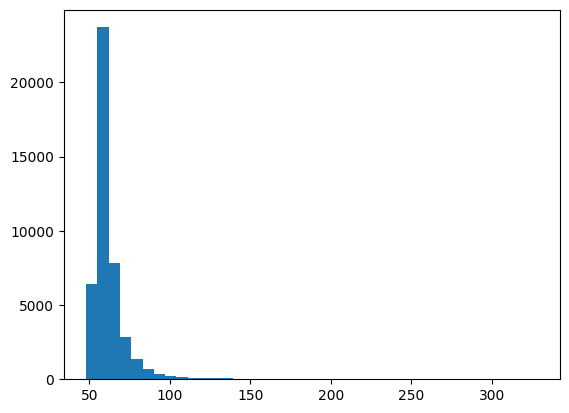

In [19]:
encoding = tiktoken.get_encoding(embedding_encoding)

df_final['tokens'] = df_final.mix.apply(lambda x: len(encoding.encode(x)))

print(sum(df_final.tokens.values))
plt.hist(df_final.tokens, bins= 40);

In [20]:
df_final=df_final[:2000]

In [21]:
#aplicamos el embedding

#ahora
df_final["embedding"] = df_final.mix.apply(lambda x: get_embedding(x, model=embedding_model))



C:\Users\Usuario\AppData\Local\Temp\ipykernel_56516\3300900005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["embedding"] = df_final.mix.apply(lambda x: get_embedding(x, model=embedding_model))


In [22]:
#df_final.head(10)

In [23]:
# Importamos el archivo resultado con la columna embedding que sera consumido para entrenar los modelos de Cluster y Clasificacion
df_final.to_csv("D:\Clustering_MeLi\src\data\processed\Embedding_test_meli.csv")


In [24]:
df_emb_3 = df_emb_2

In [25]:
df_emb_3['totalcat'] = df_emb_2['category_id'].apply(lambda x: len(str.split(x, sep=(','))))

In [31]:
df_emb_3['totalcat'].head(5)

0    1
1    1
2    2
3    1
4    2
Name: totalcat, dtype: object

In [30]:
for i in df_emb_3.columns:
    df_emb_3[i] = df_emb_3[i].astype(str)

In [33]:
df_emb_3.head(2)

,seller_nickname,products,stock,price,seller_reputation,Lt,condition,isrefu,category_id,regular_price1,pxp,mix,tokens,totalcat
0,000631669c,1,10,799.0,newbie,Other,new,not refubirshed,OTHER,no,79.9,reputation: newbie; products: 1; stock: 10; pr...,51,1
1,0007153bca,2,55,798.0,green,Cross Docking,new,not refubirshed,OTHER,no,14.51,reputation: green; products: 2; stock: 55; pri...,53,1


In [34]:
# ahora combinamos todas las variables en una sola variable, que esta sera la que se va a realizar en embedding

df_emb_3['mix'] = "reputation: " + df_emb_3['seller_reputation'].str.strip() + "; products: " + df_emb_3['products'].str.strip() + \
                    "; stock: " + df_emb_3['stock'].str.strip() + "; priceproduct: " + df_emb_3['pxp'].str.strip() + \
                    "; logistictype: " + df_emb_3['Lt'].str.strip() + "; refurbished: " + df_emb_3['isrefu'].str.strip() + \
                    "; conditionproduct: " + df_emb_3['condition'].str.strip() + "; totalCategories: " + df_emb_3['totalcat'].str.strip() + \
                    "; regularprice: " + df_emb_3['regular_price1'].str.strip()

2490436


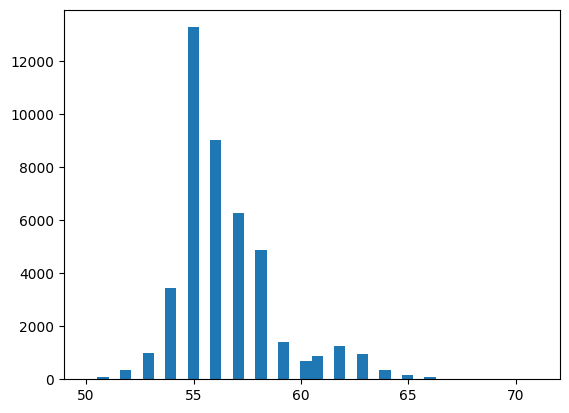

In [35]:
encoding = tiktoken.get_encoding(embedding_encoding)

df_emb_3['tokens'] = df_emb_3.mix.apply(lambda x: len(encoding.encode(x)))

print(sum(df_emb_3.tokens.values))
plt.hist(df_emb_3.tokens, bins= 40);

In [36]:
df_emb_3.shape

(44081, 14)

In [37]:
df_final_2 = df_emb_3[:2000]
print(df_final_2.shape)
df_final_2.head()

(2000, 14)


,seller_nickname,products,stock,price,seller_reputation,Lt,condition,isrefu,category_id,regular_price1,pxp,mix,tokens,totalcat
0,000631669c,1,10,799.0,newbie,Other,new,not refubirshed,OTHER,no,79.9,reputation: newbie; products: 1; stock: 10; pr...,53,1
1,0007153bca,2,55,798.0,green,Cross Docking,new,not refubirshed,OTHER,no,14.51,reputation: green; products: 2; stock: 55; pri...,55,1
2,000bee3c3b,2,0,765.0,newbie,Cross Docking,new,not refubirshed,"BOOKS, MULTIMEDIA & OTHER E!",no,inf,reputation: newbie; products: 2; stock: 0; pri...,52,2
3,000df2bd02,1,5,1550.0,green,Cross Docking,used,not refubirshed,ACC CARS & VANS,no,310.0,reputation: green; products: 1; stock: 5; pric...,55,1
4,000e27cea2,2,6,915.0,green_silver,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"HOUSEHOLD ITEMS,HEALTH",no,152.5,reputation: green_silver; products: 2; stock: ...,62,2


113213


C:\Users\Usuario\AppData\Local\Temp\ipykernel_56516\2729559168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_2['tokens'] = df_final_2.mix.apply(lambda x: len(encoding.encode(x)))


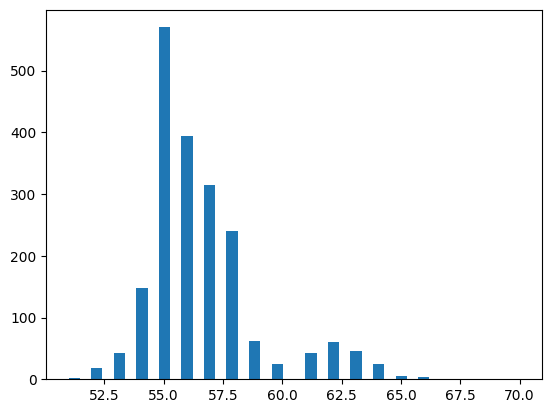

In [38]:
encoding = tiktoken.get_encoding(embedding_encoding)

df_final_2['tokens'] = df_final_2.mix.apply(lambda x: len(encoding.encode(x)))

print(sum(df_final_2.tokens.values))
plt.hist(df_final_2.tokens, bins= 40);

In [39]:
#aplicamos el embedding

#ahora
df_final_2["embedding"] = df_final_2.mix.apply(lambda x: get_embedding(x, model=embedding_model))



C:\Users\Usuario\AppData\Local\Temp\ipykernel_56516\2757183994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_2["embedding"] = df_final_2.mix.apply(lambda x: get_embedding(x, model=embedding_model))


In [40]:
df_final_2.head(5)

,seller_nickname,products,stock,price,seller_reputation,Lt,condition,isrefu,category_id,regular_price1,pxp,mix,tokens,totalcat,embedding
0,000631669c,1,10,799.0,newbie,Other,new,not refubirshed,OTHER,no,79.9,reputation: newbie; products: 1; stock: 10; pr...,53,1,"[-0.019504735246300697, -0.0005076241795904934..."
1,0007153bca,2,55,798.0,green,Cross Docking,new,not refubirshed,OTHER,no,14.51,reputation: green; products: 2; stock: 55; pri...,55,1,"[-0.002406255342066288, 0.0017549102194607258,..."
2,000bee3c3b,2,0,765.0,newbie,Cross Docking,new,not refubirshed,"BOOKS, MULTIMEDIA & OTHER E!",no,inf,reputation: newbie; products: 2; stock: 0; pri...,52,2,"[-0.01806306280195713, -0.001178268576040864, ..."
3,000df2bd02,1,5,1550.0,green,Cross Docking,used,not refubirshed,ACC CARS & VANS,no,310.0,reputation: green; products: 1; stock: 5; pric...,55,1,"[-0.009885057806968689, 0.010440726764500141, ..."
4,000e27cea2,2,6,915.0,green_silver,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"HOUSEHOLD ITEMS,HEALTH",no,152.5,reputation: green_silver; products: 2; stock: ...,62,2,"[0.002465498400852084, -0.009151219390332699, ..."


In [ ]:
# Importamos el archivo resultado con la columna embedding que sera consumido para entrenar los modelos de Cluster y Clasificacion
df_final_2.to_csv("D:\Clustering_MeLi\src\data\processed\Embedding_test_meli_2.csv")
